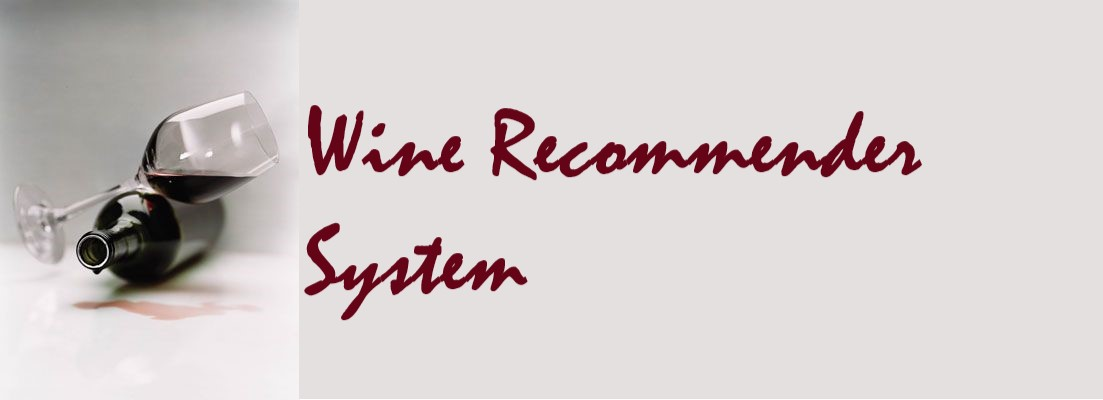

## О наборе данных
Основа - набор данных со странички [Kaggle](https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv) собраны с сайта [WineEnthusiast](https://www.winemag.com). Набор данных включает в себя~130 000 обзоров вин с такими фичами, как страна производства вина, описание обозревателя, рейтинг баллов, цена, регион, сорт и винодельня.

Столбцы:\
'country' - Страна, из которой родом вино\
'description' - Описание вина (описание сорта вина, аромата, особенностей года урожая) \
'designation' - Виноградник внутри винодельни, откуда взят виноград, из которого изготовлено вино, либо указание на то,что вино относится к категории Reserve\
'points' - Количество баллов WineEnthusiast оценило вино по шкале 1-100 (Критерии оценки: 98-100 эталон качества, 94-97 вина с "выдающимися достижениями", 90-93 отличные вина, 87-89 очень хорошие качественные вина, 83-86 вина на "каждый день"\ 
'price' - стоимость\
'province' - Провинция или штат, из которого родом вино\
'region_1' - Винодельческий район в провинции или штате (например, Напа)\
'region_2' - Иногда в пределах винодельческой зоны указываются более конкретные регионы (например, Резерфорд в долине Напа)\
'taster_name' - Автор обзора на вино\
'taster_twitter_handle' - Твиттер автора обзора\
'title' - Название обзора вина, которое часто содержит год урожая, если вы заинтересованы в извлечении этой функции\
'variety' - Сорт винограда, используемого для изготовления вина (например, Пино Нуар)\
'winery' - Винодельня, которая производила вино

## Какую задачу решаем?
Допустим есть  человек и мы знаем, что ему нравится некий набор вин. Нужно составить для этого человека рекомендации таких вин, какие понравятся ему наибольшим образом.

## Загрузка библиотек

In [ ]:
!pip install ipython-autotime

time: 2.96 s (started: 2022-01-11 19:48:22 +00:00)


In [ ]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.82 ms (started: 2022-01-11 19:48:25 +00:00)


In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, regexp_tokenize
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

time: 2.56 ms (started: 2022-01-11 19:48:25 +00:00)


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

time: 7.16 ms (started: 2022-01-11 19:48:25 +00:00)


## Загрузка данных

In [ ]:
# Загрузка набора данных с google диск
!gdown "https://drive.google.com/uc?export=download&id=1EI9nUbHp0g-hkAg7Dx1nmjDJovhDYdfL"

Downloading...
From: https://drive.google.com/uc?export=download&id=1EI9nUbHp0g-hkAg7Dx1nmjDJovhDYdfL
To: /content/winemag-data-130k-v2.csv.zip
100% 17.2M/17.2M [00:00<00:00, 151MB/s]
time: 3.05 s (started: 2022-01-11 19:48:25 +00:00)


In [ ]:
# Разархивирование
!unzip -qq -o winemag-data-130k-v2.csv.zip -d winemag

time: 641 ms (started: 2022-01-11 19:48:28 +00:00)


In [ ]:
def get_data():
    df = pd.read_csv('/content/winemag/winemag-data-130k-v2.csv')
    df.drop(columns='Unnamed: 0', inplace=True)

    print(f"Размер загруженного набора данных: {df.shape}")
    print(f"Названия столбцов: {df.columns}")
    
    return df

time: 4.02 ms (started: 2022-01-11 19:48:28 +00:00)


In [ ]:
data = get_data()
data.head()

Размер загруженного набора данных: (129971, 13)
Названия столбцов: Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


time: 939 ms (started: 2022-01-11 19:48:28 +00:00)


## Исследовательский анализ данных

In [ ]:
data.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,US,"Gravenstein apple, honeysuckle and jasmine aro...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


time: 563 ms (started: 2022-01-11 19:48:29 +00:00)


**Пропущенные значения**

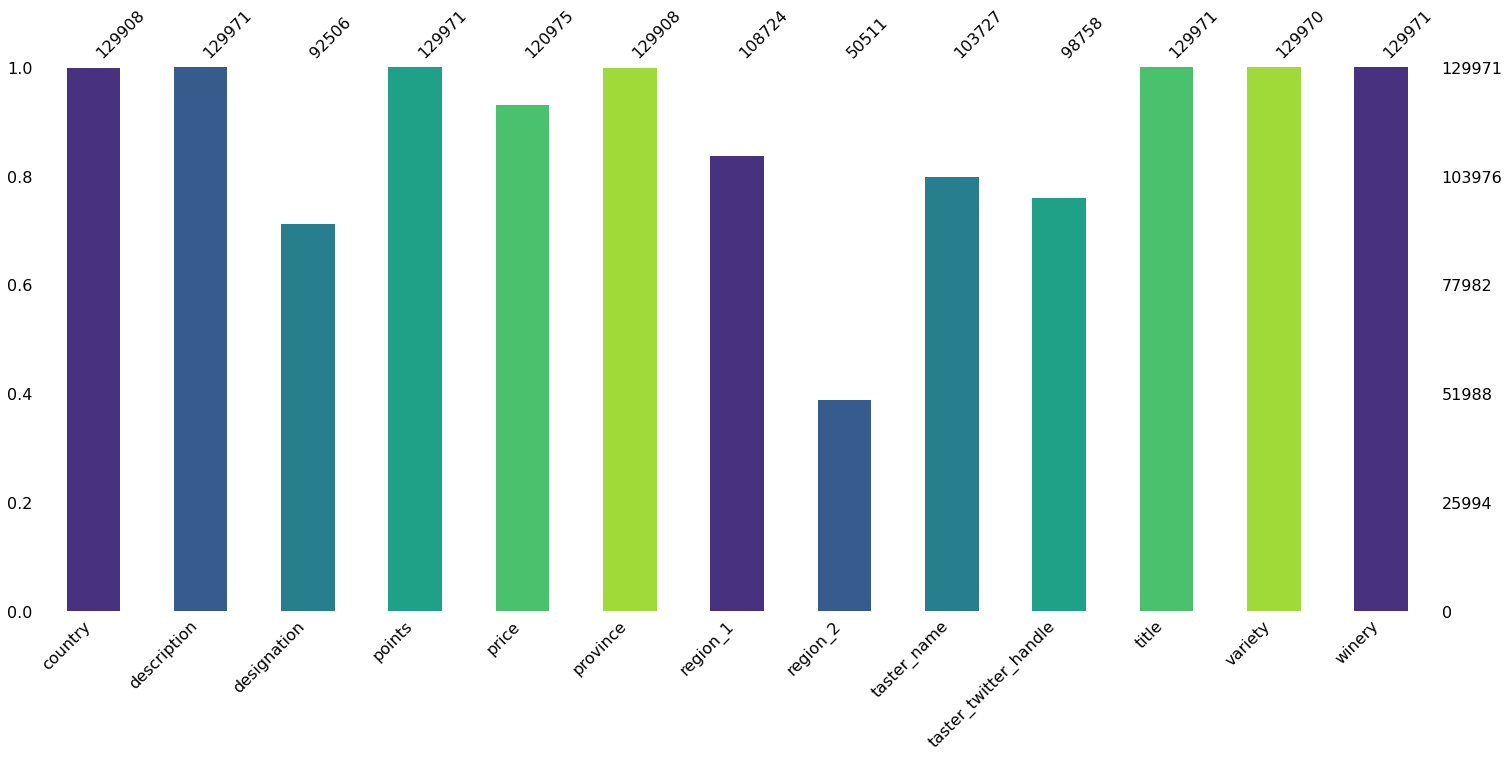

time: 1.05 s (started: 2022-01-11 19:48:30 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno

msno.bar(data, color= sns.color_palette('viridis'))

In [ ]:
data.shape

(129971, 13)

time: 3.4 ms (started: 2022-01-11 19:48:31 +00:00)


In [ ]:
data.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

time: 78.7 ms (started: 2022-01-11 19:48:31 +00:00)


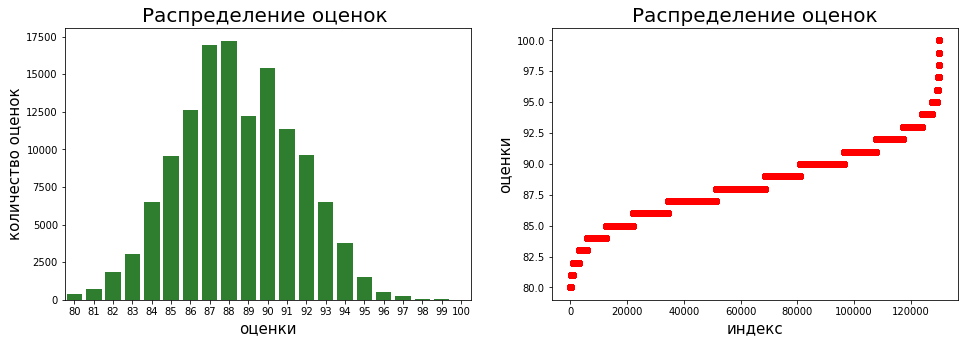

time: 741 ms (started: 2022-01-11 19:48:31 +00:00)


In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
g = sns.countplot(x='points', data=data, color='forestgreen')
g.set_title("Распределение оценок ", fontsize=20)
g.set_xlabel("оценки", fontsize=15)
g.set_ylabel("количество оценок", fontsize=15)

plt.subplot(1,2,2)
plt.scatter(range(data.shape[0]), np.sort(data.points.values), color='red')
plt.xlabel('индекс', fontsize=15)
plt.ylabel('оценки', fontsize=15)
plt.title("Распределение оценок", fontsize=20)

plt.show()

Мы можем ясно видеть распределение данных. Это кажется очень похожим на нормальное распределение. Всего несколько вин имеют менее 82 баллов и более 95 баллов. Поскольку баллы являются одним из наиболее важных показателей в этом наборе данных, будем исследовать его подробнее.

In [ ]:
def cat_points(points):
    if points in list(range(80,82)):
        return '0_вина с сомнительными качествами'
    elif points in list(range(83,86)):
        return '1_вина на "каждый день"'
    elif points in list(range(87,89)):
        return  '2_очень хорошие качественные вина'
    elif points in list(range(90,93)):
        return '3_отличные вина'
    elif points in list(range(94,97)):
        return '4_вина с "высокими достижениями"'    
    else:
        return '5_эталон качества'

data["rating_cat"] = data["points"].apply(cat_points)

time: 250 ms (started: 2022-01-11 19:48:32 +00:00)


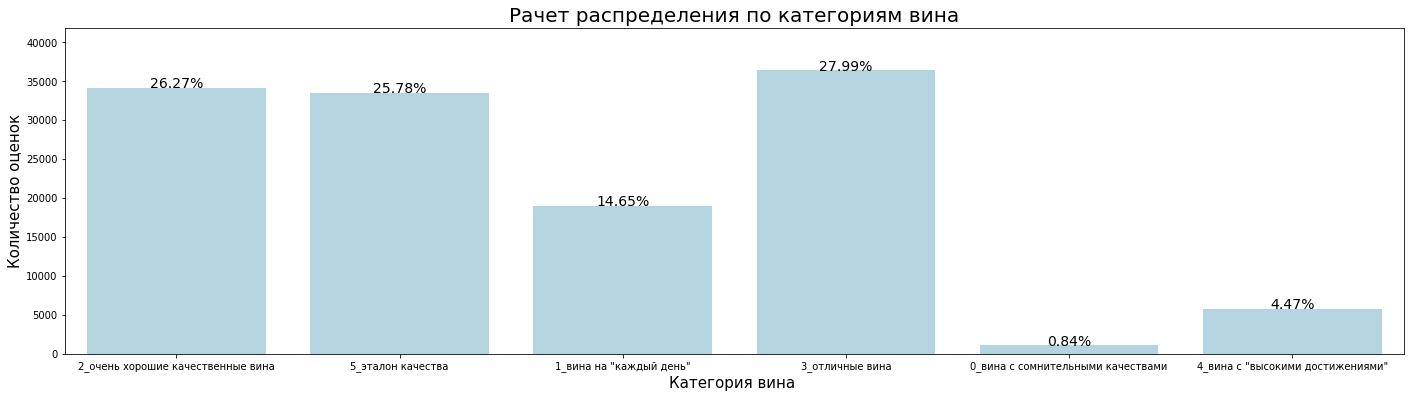

time: 323 ms (started: 2022-01-11 19:48:32 +00:00)


In [ ]:
total = len(data)
plt.figure(figsize=(24,6))

g = sns.countplot(x='rating_cat', color='lightblue', data=data)
g.set_title("Рачет распределения по категориям вина", fontsize=20)
g.set_xlabel("Категория вина ", fontsize=15)
g.set_ylabel("Количество оценок", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes)*1.15)

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


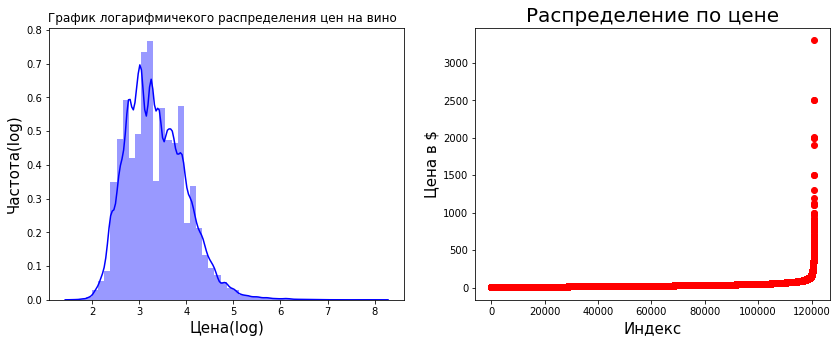

time: 1.52 s (started: 2022-01-11 19:48:32 +00:00)


In [ ]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(data['price'].dropna() + 1),
                  color='blue')
g1.set_title("График логарифмичекого распределения цен на вино  ", fontsize=12)
g1.set_xlabel("Цена(log)", fontsize=15)
g1.set_ylabel("Частота(log)", fontsize=15)

plt.subplot(122)
plt.scatter(range(data.shape[0]), np.sort(data.price.values), 
            color='red')
plt.xlabel('Индекс', fontsize=15)
plt.ylabel('Цена в $', fontsize=15)
plt.title("Распределение по цене", fontsize=20)


plt.show()

Мы видим, что данные распределены нормально

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


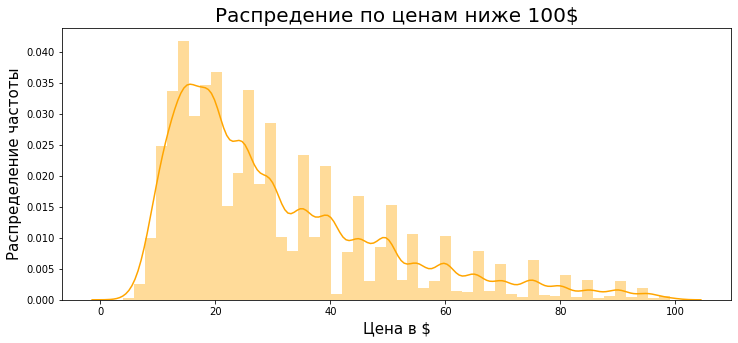

time: 1.09 s (started: 2022-01-11 19:48:34 +00:00)


In [ ]:
plt.figure(figsize=(12,5))

g = sns.distplot(data[data['price'] < 100]['price'], color='orange')
g.set_title("Распредение по ценам ниже 100$", fontsize=20)
g.set_xlabel("Цена в $", fontsize=15)
g.set_ylabel("Распределение частоты", fontsize=15)


plt.show()

На данном графике мы видим, что большинство вин имеет стоимость менее 100 долларов США

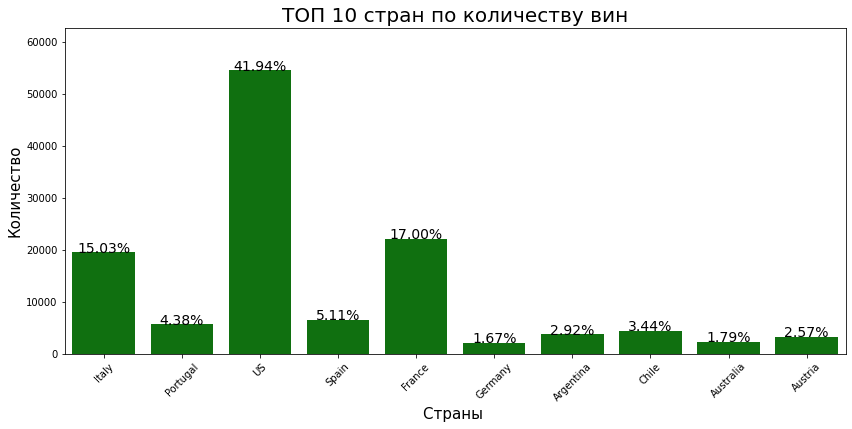

time: 344 ms (started: 2022-01-11 19:48:35 +00:00)


In [ ]:
plt.figure(figsize=(14,6))

country = data.country.value_counts()[:10]

g = sns.countplot(x='country', 
                  data=data[data.country.isin(country.index.values)],
                 color='green')
g.set_title("ТОП 10 стран по количеству вин", fontsize=20)
g.set_xlabel("Страны ", fontsize=15)
g.set_ylabel("Количество", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

In [ ]:
data['price_log'] = np.log(data['price'])

time: 7.36 ms (started: 2022-01-11 19:48:35 +00:00)


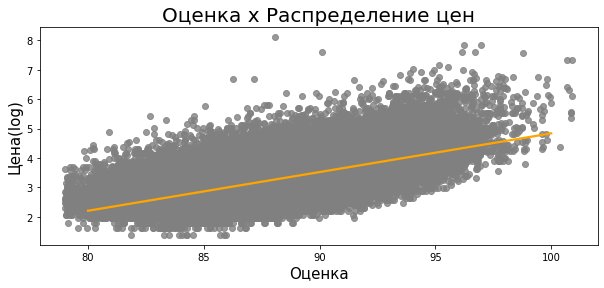

time: 14.9 s (started: 2022-01-11 19:48:35 +00:00)


In [ ]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=data, line_kws={'color':'orange'},
                x_jitter=True, fit_reg=True, color='grey')
g.set_title("Оценка x Распределение цен", fontsize=20)
g.set_xlabel("Оценка", fontsize= 15)
g.set_ylabel("Цена(log)", fontsize= 15)

plt.show()

Самые высокие цены не на вино с самой высокой пунктуацией. Самое дорогое вино имеет пунктуацию между 87 и 90. Возможно, было бы интересно создать рекомендательную систему для поиска самых дешевых вин того же качества.

## Предобработка данных

In [ ]:
def preprocess_data(input_df):
    df = input_df.copy()
    
    # Замена для последующей обработки текста
    df.loc[df.variety == 'G-S-M', 'variety'] = 'GSM'
    # Извлечение года урожая из названия обзора
    df['year'] = df['title'].str.extract('(\d\d\d\d)')

    return df

time: 4.09 ms (started: 2022-01-11 19:48:50 +00:00)


In [ ]:
data = preprocess_data(data)

time: 486 ms (started: 2022-01-11 19:48:50 +00:00)


In [ ]:
print("%.1f%% обзоров вин имеет год урожая в названии обзора." %((1-(data['year'].isnull().sum()/len(data['year'])))*100))

96.5% обзоров вин имеет год урожая в названии обзора.
time: 9.18 ms (started: 2022-01-11 19:48:51 +00:00)


## Popularity-based подход, основанный на IMDB weighted average

In [ ]:
data_ = data[['taster_name','points','title']].dropna().copy().rename(
        columns={'taster_name':'user_id', 'points':'rating', 'title':'item_id'}
    )

data_

,user_id,rating,item_id
0,Kerin O’Keefe,87,Nicosia 2013 Vulkà Bianco (Etna)
1,Roger Voss,87,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,Paul Gregutt,87,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,Alexander Peartree,87,St. Julian 2013 Reserve Late Harvest Riesling ...
4,Paul Gregutt,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
...,...,...,...
129966,Anna Lee C. Iijima,90,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967,Paul Gregutt,90,Citation 2004 Pinot Noir (Oregon)
129968,Roger Voss,90,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969,Roger Voss,90,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


time: 86.5 ms (started: 2022-01-11 19:48:51 +00:00)


In [ ]:
def weighted_rating(v,m,R,C):
    """
    Calculate the weighted rating
    
    Args:
    v -> average rating for each item (float)
    m -> minimum votes required to be classified as popular (float)
    R -> average rating for the item (pd.Series)
    C -> average rating for the whole dataset (pd.Series)
    
    Returns:
    pd.Series
    """
    return ( (v / (v + m)) * R) + ( (m / (v + m)) * C )

def assign_popular_based_score(rating_df, item_df, user_col, item_col, rating_col):
    """
    Assigned popular based score based on the IMDB weighted average.
    
    Args:
    rating -> pd.DataFrame contains ['item_id', 'rating'] for each user.
    
    Returns
    popular_items -> pd.DataFrame contains item and IMDB weighted score.
    """
    
    vote_count = (
        rating_df
        .groupby(item_col,as_index=False)
        .agg( {user_col:'count', rating_col:'mean'} )
        )
    vote_count.columns = [item_col, 'vote_count', 'avg_rating']
    
    C = np.mean(vote_count['avg_rating'])
    m = np.percentile(vote_count['vote_count'], 70)
    vote_count = vote_count[vote_count['vote_count'] >= m]
    R = vote_count['avg_rating']
    v = vote_count['vote_count']
    vote_count['weighted_rating'] = weighted_rating(v,m,R,C)
    
    vote_count = vote_count.merge(item_df, on = [item_col], how = 'left')
    popular_items = vote_count.loc[:,[item_col,  'vote_count', 'avg_rating', 'weighted_rating']]
    
    return popular_items

time: 12 ms (started: 2022-01-11 19:48:51 +00:00)


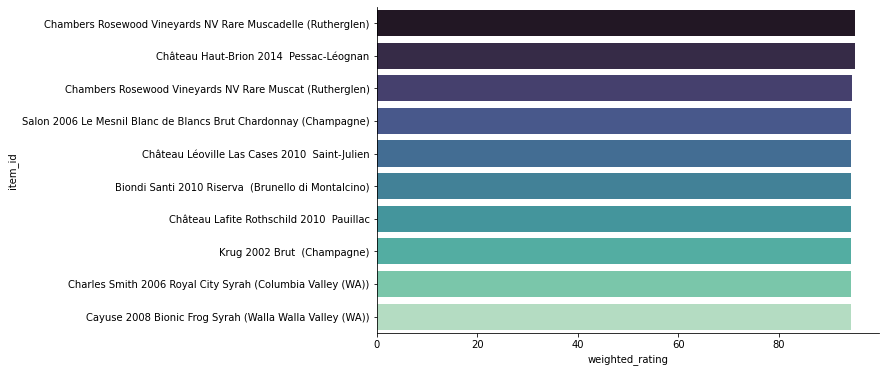

time: 614 ms (started: 2022-01-11 19:48:51 +00:00)


In [ ]:
USER_COL = 'user_id'
ITEM_COL = 'item_id'
RATING_COL = 'rating'

pop_items = assign_popular_based_score(data_,
                                       data_[['item_id']].drop_duplicates(),
                                       USER_COL, ITEM_COL, RATING_COL)

pop_items = pop_items.sort_values('weighted_rating', ascending = False)

fix, ax = plt.subplots(figsize=(9,6))

sns.barplot(data = pop_items.head(10),
            y = 'item_id',
            x = 'weighted_rating',
            palette = 'mako');

sns.despine();

In [ ]:
pop_items[:10]

,item_id,vote_count,avg_rating,weighted_rating
16043,Chambers Rosewood Vineyards NV Rare Muscadelle...,2,98.5,95.203750
19018,Château Haut-Brion 2014 Pessac-Léognan,2,98.5,95.203750
16044,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,2,97.5,94.537084
75738,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,1,100.0,94.305625
20013,Château Léoville Las Cases 2010 Saint-Julien,1,100.0,94.305625
7538,Biondi Santi 2010 Riserva (Brunello di Montal...,1,100.0,94.305625
19409,Château Lafite Rothschild 2010 Pauillac,1,100.0,94.305625
51310,Krug 2002 Brut (Champagne),1,100.0,94.305625
16395,Charles Smith 2006 Royal City Syrah (Columbia ...,1,100.0,94.305625
15526,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,1,100.0,94.305625


time: 16.6 ms (started: 2022-01-11 19:48:52 +00:00)


##Popularity-based (price/quality)

In [ ]:
# Агрегация с усреднением рейтинга и цены (убираем повторы по тем винам, где имеется несколько оценок)
group_by_columns = ['title',
                    'country',
                    'designation',
                    'province',
                    'region_1',
                    'region_2',
                    'variety',
                    'winery']
                    
grouped = data.groupby(group_by_columns, as_index=False)
data_pop = grouped[['price','points']].agg('mean')

time: 465 ms (started: 2022-01-11 19:48:52 +00:00)


In [ ]:
# Добавление индикатора "цена/качество"
data_pop['p/q'] = data_pop['points'] / data_pop['price']

time: 3.07 ms (started: 2022-01-11 19:48:52 +00:00)


In [ ]:
# Топ 10 рекомендаций по соотношению цена/качество
data_pop_1 = data_pop.sort_values(by='p/q', ascending=False)[:10]
data_pop_1

,title,country,designation,province,region_1,region_2,variety,winery,price,points,p/q
20939,Pam's Cuties NV Unoaked Chardonnay (California),US,Unoaked,California,California,California Other,Chardonnay,Pam's Cuties,4.0,83.0,20.750000
17748,Mancan NV Fizz Sparkling (California),US,Fizz,California,California,California Other,Sparkling Blend,Mancan,5.0,87.0,17.400000
9119,Earth's Harvest 2014 Organic Grapes Chardonnay...,US,Organic Grapes,California,California,California Other,Chardonnay,Earth's Harvest,5.0,85.0,17.000000
11207,Gallo Family Vineyards NV Twin Valley Pinot Gr...,US,Twin Valley,California,California,California Other,Pinot Grigio,Gallo Family Vineyards,5.0,85.0,17.000000
11206,Gallo Family Vineyards NV Twin Valley Moscato ...,US,Twin Valley,California,California,California Other,Moscato,Gallo Family Vineyards,5.0,84.0,16.800000
11208,Gallo Family Vineyards NV Twin Valley White Zi...,US,Twin Valley White,California,California,California Other,Zinfandel,Gallo Family Vineyards,5.0,83.0,16.600000
11204,Gallo Family Vineyards 2005 Twin Valley Chardo...,US,Twin Valley,California,California,California Other,Chardonnay,Gallo Family Vineyards,5.0,83.0,16.600000
10654,Fox Brook NV Sweet Red Table Wine Red (Califor...,US,Sweet Red Table Wine,California,California,California Other,Red Blend,Fox Brook,6.0,84.0,14.000000
11572,Glen Ellen 2009 Proprietor's Reserve Chardonna...,US,Proprietor's Reserve,California,California,California Other,Chardonnay,Glen Ellen,6.0,84.0,14.000000
4450,CK Mondavi 2012 Willow Springs White Zinfandel...,US,Willow Springs White,California,California,California Other,Zinfandel,CK Mondavi,6.0,83.0,13.833333


time: 40.3 ms (started: 2022-01-11 19:48:52 +00:00)


In [ ]:
# Топ 10 рекомендаций по рейтингу и соотношению цена/качество
data_pop_2 = data_pop.sort_values(by=['points','p/q'], ascending=False)[:10]
data_pop_2

,title,country,designation,province,region_1,region_2,variety,winery,price,points,p/q
5276,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,US,Bionic Frog,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Cayuse,80.0,100.0,1.250000
5706,Charles Smith 2006 Royal City Syrah (Columbia ...,US,Royal City,Washington,Columbia Valley (WA),Columbia Valley,Syrah,Charles Smith,80.0,100.0,1.250000
29389,Verité 2007 La Muse Red (Sonoma County),US,La Muse,California,Sonoma County,Sonoma,Bordeaux-style Red Blend,Verité,450.0,100.0,0.222222
9789,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,US,Estate Vineyard,California,Sonoma Coast,Sonoma,Chardonnay,Failla,44.0,99.0,2.250000
5289,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,US,En Chamberlin Vineyard,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse,75.0,99.0,1.320000
5308,Cayuse 2011 En Chamberlin Vineyard Syrah (Wall...,US,En Chamberlin Vineyard,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse,75.0,99.0,1.320000
30628,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,US,Hirsch Vineyard,California,Sonoma Coast,Sonoma,Pinot Noir,Williams Selyem,75.0,99.0,1.320000
30613,Williams Selyem 2009 Precious Mountain Vineyar...,US,Precious Mountain Vineyard,California,Sonoma Coast,Sonoma,Pinot Noir,Williams Selyem,94.0,99.0,1.053191
28587,Trefethen 2005 Reserve Cabernet Sauvignon (Oak...,US,Reserve,California,Oak Knoll District,Napa,Cabernet Sauvignon,Trefethen,100.0,99.0,0.990000
29327,Venge 2008 Family Reserve Cabernet Sauvignon (...,US,Family Reserve,California,Oakville,Napa,Cabernet Sauvignon,Venge,125.0,99.0,0.792000


time: 38.3 ms (started: 2022-01-11 19:48:52 +00:00)


## Popularity-based (best points from each taster)
Основано на гипотезе, что есть пользователи "жадные" и "щедрые" до высоких оценок
В нашем датасете вина оценены экспертами. Эксперты оценивали вина по регионам. Каждый эксперт - эксперт в одном или нескольких регионах, но не во всех.

In [ ]:
def define_top_wines(data):
    user_name = set(data.taster_name.values)
    i = 0
    top_wines = pd.DataFrame(columns = ['title','points'])
    while i < len(user_name):
        for name in user_name:
            user_points = data[data.taster_name==name][['title','points']]
            winner = user_points.max()
            top_wines = top_wines.append(winner, ignore_index=True)
            i +=1
        return top_wines.sort_values(by='points', ascending=False)

wine_df =  data.dropna(subset = ['taster_name'])
  
define_top_wines(wine_df)

,title,points
9,Ökonomierat Rebholz 2007 Von Rotliegenden Spät...,100
15,àMaurice NV Pour Me Red (Columbia Valley (WA)),100
14,Éric & Jöel Durand 1999 Empreintes (Cornas),100
5,Ïl Macchione 2009 Vino Nobile di Montepulciano,100
12,un4seen 2012 Sauvignon Blanc (Lodi),99
6,Štoka 2009 Izbrani Teran (Kras),98
11,Öko 2013 Made With Organically Grown Grapes Ma...,98
1,flipflop 2012 Chardonnay (California),97
13,àMaurice 2014 Fred Estate Syrah (Walla Walla V...,97
8,Órale 2011 Cabronita Red (Santa Ynez Valley),97


time: 491 ms (started: 2022-01-11 19:48:52 +00:00)


## Content-based
P.S. takes a lot of memory

In [ ]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2_очень хорошие качественные вина,NaN,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2_очень хорошие качественные вина,2.708050,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2_очень хорошие качественные вина,2.639057,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2_очень хорошие качественные вина,2.564949,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2_очень хорошие качественные вина,4.174387,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),3_отличные вина,3.332205,2013
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,3_отличные вина,4.317488,2004
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,3_отличные вина,3.401197,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,3_отличные вина,3.465736,2012


time: 47.5 ms (started: 2022-01-11 19:48:53 +00:00)


In [ ]:
data.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
rating_cat                   0
price_log                 8996
year                      4609
dtype: int64

time: 91 ms (started: 2022-01-11 19:48:53 +00:00)


In [ ]:
data.nunique()

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
rating_cat                    6
price_log                   390
year                         91
dtype: int64

time: 358 ms (started: 2022-01-11 19:48:53 +00:00)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

time: 1.64 ms (started: 2022-01-11 19:48:53 +00:00)


In [ ]:
coll_df = data.copy()

time: 15.5 ms (started: 2022-01-11 19:48:53 +00:00)


In [ ]:
coll_df['country'] = coll_df['country'].fillna('Unknown')
coll_df['province'] = coll_df['province'].fillna('Unknown')
coll_df['region_1'] = coll_df['region_1'].fillna('Unknown')
coll_df['taster_name'] = coll_df['taster_name'].fillna('Unknown')
coll_df['variety'] = coll_df['variety'].fillna('Unknown')
coll_df['year'] = coll_df['year'].fillna('Unknown')

time: 57.5 ms (started: 2022-01-11 19:48:53 +00:00)


In [ ]:
small_unique_columns = ['country', 'province', 'region_1', 'taster_name', 'variety', 'year']

time: 871 µs (started: 2022-01-11 19:48:53 +00:00)


In [ ]:
encoder = OneHotEncoder(dtype=np.float32)

feature_matrix = encoder.fit_transform(coll_df[small_unique_columns])
feature_matrix

<129971x2520 sparse matrix of type '<class 'numpy.float32'>'
	with 779826 stored elements in Compressed Sparse Row format>

time: 258 ms (started: 2022-01-11 19:48:53 +00:00)


In [ ]:
num_sample = 60_000

original_indices_sample = np.random.choice(feature_matrix.shape[0], size=num_sample)
feature_matrix_sample = feature_matrix[original_indices_sample]

time: 8.61 ms (started: 2022-01-11 19:48:54 +00:00)


In [ ]:
corr_matrix = cosine_similarity(feature_matrix_sample, dense_output=False)
corr_matrix

<60000x60000 sparse matrix of type '<class 'numpy.float32'>'
	with 1359023386 stored elements in Compressed Sparse Row format>

time: 23.3 s (started: 2022-01-11 19:48:54 +00:00)


In [ ]:
liked_wines_indices = np.random.choice(num_sample, 5)
liked_wines_indices

array([41652, 36254, 38729, 10660, 58222])

time: 6.04 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
dense_correlations = np.array(corr_matrix[liked_wines_indices].todense())

time: 3.21 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
recommendations_for_each_liked_wine = dense_correlations.argsort(-1)[:, -6:-1]
recommendations_for_each_liked_wine

array([[46367, 59910, 35985, 12286, 41652],
       [42430, 29360,  7089, 54162, 18526],
       [42836, 29611,  5709, 37900,  5780],
       [48628, 54554,  6377, 41105, 18209],
       [47594, 43915, 55396, 11538, 55952]])

time: 16.2 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
for recommendations, liked_wine_indx in zip(recommendations_for_each_liked_wine, liked_wines_indices):
    print('Liked wine:')
    display(coll_df.iloc[original_indices_sample[[liked_wine_indx]]])
    print('Recommendations:')
    display(coll_df.iloc[original_indices_sample[recommendations]].sort_values(by=['points', 'price'], ascending=[False, True]))
    print('-' * 10)

Liked wine:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
105641,Italy,This Riserva expression of Merlot from cool-cl...,Gant Riserva,93,45.0,Northeastern Italy,Alto Adige,NaN,Unknown,NaN,Andriano 2007 Gant Riserva Merlot (Alto Adige),Merlot,Andriano,5_эталон качества,3.806662,2007


Recommendations:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
105641,Italy,This Riserva expression of Merlot from cool-cl...,Gant Riserva,93,45.0,Northeastern Italy,Alto Adige,NaN,Unknown,NaN,Andriano 2007 Gant Riserva Merlot (Alto Adige),Merlot,Andriano,5_эталон качества,3.806662,2007
105641,Italy,This Riserva expression of Merlot from cool-cl...,Gant Riserva,93,45.0,Northeastern Italy,Alto Adige,NaN,Unknown,NaN,Andriano 2007 Gant Riserva Merlot (Alto Adige),Merlot,Andriano,5_эталон качества,3.806662,2007
105641,Italy,This Riserva expression of Merlot from cool-cl...,Gant Riserva,93,45.0,Northeastern Italy,Alto Adige,NaN,Unknown,NaN,Andriano 2007 Gant Riserva Merlot (Alto Adige),Merlot,Andriano,5_эталон качества,3.806662,2007
77522,Italy,There is a lot of plump citrus fruit here such...,SelectArt,88,39.0,Northeastern Italy,Alto Adige,NaN,Unknown,NaN,Girlan 2007 SelectArt Sauvignon (Alto Adige),Sauvignon,Girlan,2_очень хорошие качественные вина,3.663562,2007
75957,Italy,Benefizium Porer comes off as a very easy- dri...,Benefizium Porer,85,25.0,Northeastern Italy,Alto Adige,NaN,Unknown,NaN,Alois Lageder 2007 Benefizium Porer Pinot Grig...,Pinot Grigio,Alois Lageder,"1_вина на ""каждый день""",3.218876,2007


----------
Liked wine:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
18188,US,From a ripe and picture-perfect growing season...,Envoy,90,38.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,Sonoma-Loeb 2013 Envoy Chardonnay (Carneros),Chardonnay,Sonoma-Loeb,3_отличные вина,3.637586,2013


Recommendations:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
103180,US,"A perennial standout, this is an exuberantly r...",Red Shoulder Ranch,94,52.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,Shafer 2013 Red Shoulder Ranch Chardonnay (Car...,Chardonnay,Shafer,"4_вина с ""высокими достижениями""",3.951244,2013
96645,US,"This is a dry, full-bodied deal of a wine, off...",NaN,90,16.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,RouteStock 2013 Chardonnay (Carneros),Chardonnay,RouteStock,3_отличные вина,2.772589,2013
5672,US,Toast with apricot jam comes first to mind in ...,Reserve,90,55.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,Robert Mondavi 2013 Reserve Chardonnay (Carneros),Chardonnay,Robert Mondavi,3_отличные вина,4.007333,2013
75018,US,"Big, ripe waves of baked apple, pear and pinea...",NaN,88,30.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,Luke Donald 2013 Chardonnay (Carneros),Chardonnay,Luke Donald,2_очень хорошие качественные вина,3.401197,2013
112490,US,"Golden in color, this wine otherwise exhibits ...",Leveroni Vineyard,88,32.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,August Briggs 2013 Leveroni Vineyard Chardonna...,Chardonnay,August Briggs,2_очень хорошие качественные вина,3.465736,2013


----------
Liked wine:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,3_отличные вина,3.401197,2013


Recommendations:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
92330,France,"This is a real apéritif wine, full of approach...",Holder,89,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Henri Schoenheitz 2013 Holder Gewurztraminer (...,Gewürztraminer,Henri Schoenheitz,5_эталон качества,3.401197,2013
96783,France,"There's a freshness to this wine, a product of...",Réserve,88,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2013 Réserve Gewurztraminer...,Gewürztraminer,Jean-Baptiste Adam,2_очень хорошие качественные вина,3.178054,2013
96783,France,"There's a freshness to this wine, a product of...",Réserve,88,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2013 Réserve Gewurztraminer...,Gewürztraminer,Jean-Baptiste Adam,2_очень хорошие качественные вина,3.178054,2013
99033,France,"Light and fruity, this wine has as much perfum...",Vendanges Tardives,87,55.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Boeckel 2013 Vendanges Tardives Gewurztraminer...,Gewürztraminer,Boeckel,2_очень хорошие качественные вина,4.007333,2013
81612,France,"Medium sweet in style, this igentle wine has a...",Les Natures,85,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2013 Les Natures Gewurztram...,Gewürztraminer,Jean-Baptiste Adam,"1_вина на ""каждый день""",3.295837,2013


----------
Liked wine:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
125247,US,"With a riper profile than the 2014, this vinta...",Sullivan,92,52.0,Oregon,Willamette Valley,NaN,Paul Gregutt,@paulgwine,Fairsing 2015 Sullivan Pinot Noir,Pinot Noir,Fairsing,3_отличные вина,3.951244,2015


Recommendations:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
51018,US,This intriguing category—white wine made from ...,Philtrum Blanc,92,34.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Aberrant Cellars 2015 Philtrum Blanc Pinot Noi...,Pinot Noir,Aberrant Cellars,3_отличные вина,3.526361,2015
81340,US,This is an outstanding value in a Willamette V...,NaN,91,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Ruby 2015 Pinot Noir (Willamette Valley),Pinot Noir,Ruby,3_отличные вина,3.091042,2015
20050,US,"Consistent with the 2014 Confero, this blends ...",Confero,91,29.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Aberrant Cellars 2015 Confero Pinot Noir (Will...,Pinot Noir,Aberrant Cellars,3_отличные вина,3.367296,2015
124729,US,Production has increased six-fold in this vint...,Rosé of,90,13.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Acrobat 2015 Rosé of Pinot Noir (Willamette Va...,Pinot Noir,Acrobat,3_отличные вина,2.564949,2015
32972,US,This bright and fruity Beaujolais-style wine i...,Whole Cluster,90,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Willamette Valley Vineyards 2015 Whole Cluster...,Pinot Noir,Willamette Valley Vineyards,3_отличные вина,3.091042,2015


----------
Liked wine:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
32958,US,"Firm, a bit astringent and dry, with ripe flav...",Kit's Killer Cab,87,38.0,California,Napa Valley,Napa,Unknown,NaN,Clif Family 2006 Kit's Killer Cab Cabernet Sau...,Cabernet Sauvignon,Clif Family,2_очень хорошие качественные вина,3.637586,2006


Recommendations:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
45798,US,Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Napa Valley,Napa,Unknown,NaN,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale,5_эталон качества,5.298317,2006
69217,US,"Mainly Cabernet Sauvignon, with some Franc, th...",Founders Art,93,65.0,California,Napa Valley,Napa,Unknown,NaN,Judd's Hill 2006 Founders Art Cabernet Sauvign...,Cabernet Sauvignon,Judd's Hill,5_эталон качества,4.174387,2006
62902,US,"Made in a very ripe, intensely concentrated st...",NaN,92,40.0,California,Napa Valley,Napa,Unknown,NaN,Zahtila 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Zahtila,3_отличные вина,3.688879,2006
30377,US,"Made in the modern cult style, this Cabernet i...",Fifth Edition,91,80.0,California,Napa Valley,Napa,Unknown,NaN,Robledo 2006 Fifth Edition Cabernet Sauvignon ...,Cabernet Sauvignon,Robledo,3_отличные вина,4.382027,2006
54479,US,"A strong, bold young wine, with good varietal ...",Unfiltered,87,50.0,California,Napa Valley,Napa,Unknown,NaN,Barlow 2006 Unfiltered Cabernet Sauvignon (Nap...,Cabernet Sauvignon,Barlow,2_очень хорошие качественные вина,3.912023,2006


----------
time: 348 ms (started: 2022-01-11 19:49:17 +00:00)


## Сравнение popularity-based и content-based подхода с использованием метрик

В данном разделе попробуем показать на конкретном примере разницу в эффективности работы popularity-based и content-based подходов с использованием метрики precision@k - доли релевантных предсказаний среди первых k ответов, где k = 10 в нашем случае.

Сложность объективной/метрической оценки состоит в том, что характер имеющегося датасета не дает возможности получить некий эталонный ожидаемый ответ для модели, относительно которого можно сверять результаты работы разных моделей. По этой причине придется ввести некоторые допущения и уточнить/доработать классическую формулу выбранной метрики.


Будем считать результат релевантным, если рекомендуемое системой вино:

1) Имеет ту же страну производства что и вино, для которого делается рекомендация (географический фактор - зачастую осноопределяющий при выборе вина);

2) Имеет рейтинг не меньше чем на 3 пункта ниже относительно рейтинга вина, для которого делается рекомендация (вкусовой фактор - оценка дегустатора, которая агрегирует внутри себя все особенности вина);

3) Имеет цену не выше 20% относительно цены вина, для которого делается рекомендация (ценовой фактор - можно порекомендовать хорошее вино, но если оно будет сильно отличаться по цене относительно вина, для которого делается рекомендация, то врятли рекомендуемое вино будет приобретено и попробовано (исходим из теории рационального выбора), и, следовательно, такая рекомендация не релевантна). Для тех вин, где цена не указана, данная проверка не выполняется.

### Функции

In [ ]:
def single_wine_precision_at_k(source_wine_s: pd.core.series.Series, recommended_wine_s: pd.core.series.Series) -> bool:
    """
    Функция для проверки факторов рекомендуемого вина относительно вина,
    для которого делается рекомендация
    """

    relevant_country = 0
    relevant_points = 0
    relevant_price = 0

    #Проверка географического фактора
    if source_wine_s['country'] == recommended_wine_s['country']:
      relevant_country = 1

    #Проверка вкусового фактора
    if recommended_wine_s['points'] >= source_wine_s['points']-3:
      relevant_points = 1
    else:
      relevant_points = 0

    #Проверка ценового фактора
    if np.isnan(source_wine_s['price']) or np.isnan(recommended_wine_s['price']):
      relevant_price = 1
    else:
      if recommended_wine_s['price'] <= source_wine_s['price']*1.2:
        relevant_price = 1
      else:
        relevant_price = 0

    return relevant_country and relevant_points and relevant_price

time: 10.2 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
def set_of_wine_precision_at_k(source_wine_s: pd.core.series.Series, recommended_wine_df: pd.core.frame.DataFrame, k: int) -> float:
    """
    Функция для расчета показателя precision@k для сета рекомендаций
    """
    result = 0.0
    for i, row in recommended_wine_df[:k].iterrows():
      if single_wine_precision_at_k(source_wine_s,row) == 1:
        result += 1

    return result / k

time: 3.46 ms (started: 2022-01-11 19:49:17 +00:00)


### Тестирование работоспособности функций

In [ ]:
source_wine = data.iloc[0]
source_wine

country                                                              Italy
description              Aromas include tropical fruit, broom, brimston...
designation                                                   Vulkà Bianco
points                                                                  87
price                                                                  NaN
province                                                 Sicily & Sardinia
region_1                                                              Etna
region_2                                                               NaN
taster_name                                                  Kerin O’Keefe
taster_twitter_handle                                         @kerinokeefe
title                                    Nicosia 2013 Vulkà Bianco  (Etna)
variety                                                        White Blend
winery                                                             Nicosia
rating_cat               

time: 6.43 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
recommended_wine = data.iloc[6]
recommended_wine

country                                                              Italy
description              Here's a bright, informal red that opens with ...
designation                                                        Belsito
points                                                                  87
price                                                                   16
province                                                 Sicily & Sardinia
region_1                                                          Vittoria
region_2                                                               NaN
taster_name                                                  Kerin O’Keefe
taster_twitter_handle                                         @kerinokeefe
title                     Terre di Giurfo 2013 Belsito Frappato (Vittoria)
variety                                                           Frappato
winery                                                     Terre di Giurfo
rating_cat               

time: 5.64 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
print(single_wine_precision_at_k(source_wine, recommended_wine))

1
time: 1.6 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
recommended_wine_df = data.iloc[1:11]
recommended_wine_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2_очень хорошие качественные вина,2.708050,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2_очень хорошие качественные вина,2.639057,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2_очень хорошие качественные вина,2.564949,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2_очень хорошие качественные вина,4.174387,2012
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2_очень хорошие качественные вина,2.708050,2011
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2_очень хорошие качественные вина,2.772589,2013
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2_очень хорошие качественные вина,3.178054,2012
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2_очень хорошие качественные вина,2.484907,2013
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2_очень хорошие качественные вина,3.295837,2012
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2_очень хорошие качественные вина,2.944439,2011


time: 39.9 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
print(set_of_wine_precision_at_k(source_wine, recommended_wine_df,10))

0.1
time: 4.19 ms (started: 2022-01-11 19:49:17 +00:00)


### Сравнение метрик по случайно выбранным вину

In [ ]:
#Выбор случайного вина для получения рекомендаций
#source_wine_for_recommendation = data.loc[data.sample(n=1).index]
source_wine_index = np.random.choice(num_sample, 1)
source_wine_for_recommendation = coll_df.iloc[original_indices_sample[source_wine_index]]
source_wine_for_recommendation

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
81679,US,This widely available and comparatively cheap ...,NaN,88,17.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Edna Valley Vineyard 2015 Pinot Noir (Central ...,Pinot Noir,Edna Valley Vineyard,2_очень хорошие качественные вина,2.833213,2015


time: 32.5 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
#Получение рекомендаций с помощью content-based подхода
dense_correlations = np.array(corr_matrix[source_wine_index].todense())

recommendations_for_liked_wine = dense_correlations.argsort(-1)[:, -11:-1]

data_con_1 = coll_df.iloc[original_indices_sample[recommendations_for_liked_wine[0]]]

time: 7.49 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
data_con_1

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_cat,price_log,year
91323,US,A blend of grapes from North Canyon and Fiddle...,NaN,88,25.0,California,Santa Barbara County,Central Coast,Matt Kettmann,@mattkettmann,Lyric by Etude 2015 Pinot Noir (Santa Barbara ...,Pinot Noir,Lyric by Etude,2_очень хорошие качественные вина,3.218876,2015
52765,US,A rusty minerality shows on the nose of this b...,NaN,86,23.0,California,Monterey,Central Coast,Matt Kettmann,@mattkettmann,La Crema 2015 Pinot Noir (Monterey),Pinot Noir,La Crema,5_эталон качества,3.135494,2015
79540,US,"Earthy aromas of rust, loam and dark red plum ...",La Encantada Vineyard,91,65.0,California,Sta. Rita Hills,Central Coast,Matt Kettmann,@mattkettmann,Testarossa 2015 La Encantada Vineyard Pinot No...,Pinot Noir,Testarossa,3_отличные вина,4.174387,2015
37742,US,"Heirloom tomatoes, tomato leaf, green olives, ...",NaN,93,42.0,California,Santa Maria Valley,Central Coast,Matt Kettmann,@mattkettmann,Presqu'ile 2015 Pinot Noir (Santa Maria Valley),Pinot Noir,Presqu'ile,5_эталон качества,3.737670,2015
95547,US,Though still exploring the zesty acid-driven s...,Presqu'ile Vineyard,95,44.0,California,Santa Maria Valley,Central Coast,Matt Kettmann,@mattkettmann,Piro 2015 Presqu'ile Vineyard Pinot Noir (Sant...,Pinot Noir,Piro,"4_вина с ""высокими достижениями""",3.784190,2015
68643,US,Root beer and slate show on the very restraine...,Grand Reserve,85,26.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Kendall-Jackson 2013 Grand Reserve Pinot Noir ...,Pinot Noir,Kendall-Jackson,"1_вина на ""каждый день""",3.258097,2013
81679,US,This widely available and comparatively cheap ...,NaN,88,17.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Edna Valley Vineyard 2015 Pinot Noir (Central ...,Pinot Noir,Edna Valley Vineyard,2_очень хорошие качественные вина,2.833213,2015
127879,US,"A bit reserved on the nose at first, this styl...",Lake Shore,87,26.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,City Winery Chicago 2015 Lake Shore Pinot Noir...,Pinot Noir,City Winery Chicago,2_очень хорошие качественные вина,3.258097,2015
81679,US,This widely available and comparatively cheap ...,NaN,88,17.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Edna Valley Vineyard 2015 Pinot Noir (Central ...,Pinot Noir,Edna Valley Vineyard,2_очень хорошие качественные вина,2.833213,2015
113176,US,Warm cherry pie and hibiscus notes meet with c...,NaN,86,16.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Layer Cake 2015 Pinot Noir (Central Coast),Pinot Noir,Layer Cake,5_эталон качества,2.772589,2015


time: 38.3 ms (started: 2022-01-11 19:49:17 +00:00)


In [ ]:
source_wine_for_recommendation = source_wine_for_recommendation.squeeze()
print("Выбранное вино: ")
print(source_wine_for_recommendation)

Выбранное вино: 
country                                                                 US
description              This widely available and comparatively cheap ...
designation                                                            NaN
points                                                                  88
price                                                                   17
province                                                        California
region_1                                                     Central Coast
region_2                                                     Central Coast
taster_name                                                  Matt Kettmann
taster_twitter_handle                                        @mattkettmann
title                    Edna Valley Vineyard 2015 Pinot Noir (Central ...
variety                                                         Pinot Noir
winery                                                Edna Valley Vineyard
rating_c

In [ ]:
print("precision@k для popularity-based подхода (Топ 10 рекомендаций по соотношению цена/качество): ")
print(set_of_wine_precision_at_k(source_wine_for_recommendation, data_pop_1, 10))

print("precision@k для popularity-based подхода (Топ 10 рекомендаций по рейтингу и соотношению цена/качество): ")
print(set_of_wine_precision_at_k(source_wine_for_recommendation, data_pop_2, 10))

print("precision@k для content-based подхода: ")
print(set_of_wine_precision_at_k(source_wine_for_recommendation, data_con_1, 10))

precision@k для popularity-based подхода (Топ 10 рекомендаций по соотношению цена/качество): 
0.3
precision@k для popularity-based подхода (Топ 10 рекомендаций по рейтингу и соотношению цена/качество): 
0.0
precision@k для content-based подхода: 
0.3
time: 10.3 ms (started: 2022-01-11 19:49:17 +00:00)


## Collaborative based Generalized Matrix Factorization (GMF) 

В данном подходе мы будем использовать нейросети для того, чтобы оценить латентные матрицы для пользователей и объектов.  
Затем, эти латентные матрицы можно будет использовать для предсказания.

Для нейросетей мы будем использовать фреймворк keras.
Мы будем использовать обертку над обычными моделями keras, которая сделана специально для построения рекомендательных систем – tensorflow-recommenders.

In [ ]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

time: 6.08 s (started: 2022-01-11 19:49:18 +00:00)


In [ ]:
data_gfm = data[['taster_name','points','title']].dropna().copy().rename(columns={'taster_name':'user_id',
                                                                                        'points':'rating',
                                                                                        'title':'item_id'})
data_gfm

,user_id,rating,item_id
0,Kerin O’Keefe,87,Nicosia 2013 Vulkà Bianco (Etna)
1,Roger Voss,87,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,Paul Gregutt,87,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,Alexander Peartree,87,St. Julian 2013 Reserve Late Harvest Riesling ...
4,Paul Gregutt,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
...,...,...,...
129966,Anna Lee C. Iijima,90,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967,Paul Gregutt,90,Citation 2004 Pinot Noir (Oregon)
129968,Roger Voss,90,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969,Roger Voss,90,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


time: 61.4 ms (started: 2022-01-11 19:49:24 +00:00)


In [ ]:
user_id = data_gfm.user_id.unique()
item_id = data_gfm.item_id.unique()

time: 42.4 ms (started: 2022-01-11 19:49:24 +00:00)


In [ ]:
import tensorflow as tf
import tensorflow_recommenders as tfrs
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

from typing import Dict, Text, Tuple

def df_to_ds(df):

    """convert pd.DataFrame to tf.data.Dataset
       returns: tf.Dataset mapped"""
    ds = tf.data.Dataset.from_tensor_slices(
        (dict(df[['user_id','item_id']]), df['rating']))
    
    # convert Tuple[Dict[Text, tf.Tensor], tf.Tensor] to Dict[Text, tf.Tensor]
    ds = ds.map(lambda x, y: {
    'user_id' : x['user_id'],
    'item_id' : x['item_id'],
    'rating' : y
    })

    return ds.batch(256)

time: 6.02 ms (started: 2022-01-11 19:49:24 +00:00)


In [ ]:
class RankingModel(keras.Model):
    def __init__(self, user_id, item_id, embedding_size):
        super().__init__()
        
        # user model
        input = keras.Input(shape=(), dtype=tf.string)
        x = keras.layers.StringLookup(
            vocabulary = user_id, mask_token = None
            )(input)
        output = keras.layers.Embedding(
            input_dim = len(user_id) + 1,
            output_dim = embedding_size,
            name = 'embedding'
        )(x)
        self.user_model = keras.Model(inputs = input,
                                      outputs = output,
                                      name = 'user_model')

        # item model
        input = keras.Input(shape=(), dtype=tf.string)
        x = keras.layers.StringLookup(
            vocabulary = item_id, mask_token = None
            )(input)
        output = keras.layers.Embedding(
            input_dim = len(item_id) + 1,
            output_dim = embedding_size,
            name = 'embedding'
        )(x)
        self.item_model = keras.Model(inputs = input,
                                  outputs = output,
                                  name = 'item_model')

        # rating model
        user_input = keras.Input(shape=(embedding_size,), name='user_emb')
        item_input = keras.Input(shape=(embedding_size,), name='item_emb')
        x = keras.layers.Concatenate(axis=1)([user_input, item_input])
        x = keras.layers.Dense(256, activation = 'relu')(x)
        x = keras.layers.Dense(64, activation = 'relu')(x)
        output = keras.layers.Dense(1)(x)
        
        self.rating_model = keras.Model(
            inputs = {
                'user_id' : user_input,
                'item_id' : item_input
            },
            outputs = output,
            name = 'rating_model'
        )

    def call(self, inputs: Dict[Text, tf.Tensor]) -> tf.Tensor:
        user_emb = self.user_model(inputs['user_id'])
        item_emb = self.item_model(inputs['item_id'])

        prediction = self.rating_model({
            'user_id' : user_emb,
            'item_id' : item_emb
        })
        
        return prediction

class GMFModel(tfrs.models.Model):
    def __init__(self, user_id, item_id, embedding_size):
        super().__init__()
        self.ranking_model = RankingModel(user_id, item_id, embedding_size)
        self.task = tfrs.tasks.Ranking(
            loss = keras.losses.MeanSquaredError(),
            metrics = [keras.metrics.RootMeanSquaredError()]
        )
    
    def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
        return self.ranking_model(
            {
             'user_id' : features['user_id'], 
             'item_id' : features['item_id']
            })

    def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
        return self.task(labels = features.pop('rating'),
                         predictions = self.ranking_model(features))

time: 51.4 ms (started: 2022-01-11 19:49:24 +00:00)


In [ ]:
train, test = train_test_split(data_gfm, train_size = 0.8, random_state=42)


time: 18.2 ms (started: 2022-01-11 19:49:24 +00:00)


In [ ]:
items = tf.data.Dataset.from_tensor_slices(dict(data_gfm[['item_id']]))
items = items.map(lambda x:  x['item_id'])
items

<MapDataset shapes: (), types: tf.string>

time: 45.4 ms (started: 2022-01-11 19:49:24 +00:00)


In [ ]:
train, test = df_to_ds(train), df_to_ds(test)

time: 60 ms (started: 2022-01-11 19:49:24 +00:00)


In [ ]:
embedding_size = 64
model = GMFModel(user_id.astype(str),
                 item_id.astype(str),
                 embedding_size)
model.compile(
    optimizer = keras.optimizers.Adagrad(learning_rate = .01)
)

model.fit(train, epochs=5, verbose=0)

time: 8.78 s (started: 2022-01-11 19:49:24 +00:00)


In [ ]:
model.evaluate(test, return_dict=True)


82/82 [==============================] - 0s 3ms/step - root_mean_squared_error: 3.2222 - loss: 10.4678 - regularization_loss: 0.0000e+00 - total_loss: 10.4678


{'loss': 13.998605728149414,
 'regularization_loss': 0,
 'root_mean_squared_error': 3.222174882888794,
 'total_loss': 13.998605728149414}

time: 326 ms (started: 2022-01-11 19:49:33 +00:00)


In [ ]:
model.evaluate(train, return_dict=True)

325/325 [==============================] - 1s 3ms/step - root_mean_squared_error: 0.5686 - loss: 0.3335 - regularization_loss: 0.0000e+00 - total_loss: 0.3335


{'loss': 2.107464075088501,
 'regularization_loss': 0,
 'root_mean_squared_error': 0.5685958862304688,
 'total_loss': 2.107464075088501}

time: 865 ms (started: 2022-01-11 19:49:33 +00:00)


In [ ]:
# Тестовая рекомендация. Код по ссылке https://www.tensorflow.org/recommenders/examples/basic_retrieval
index = tfrs.layers.factorized_top_k.BruteForce(model.ranking_model.user_model)
index.index_from_dataset(
  tf.data.Dataset.zip((items.batch(100), items.batch(100).map(model.ranking_model.item_model)))
)

_, titles = index(tf.constant(["42"]))
print(f"Recommendations for user 42: {titles[0, :3]}")

Recommendations for user 42: [b'Livernano 2012 Casalvento  (Chianti Classico)'
 b'Livernano 2012 Casalvento  (Chianti Classico)'
 b'Stobi 2011 Veritas Vranec (Tikves)']
time: 704 ms (started: 2022-01-11 19:49:34 +00:00)


In [ ]:
model.ranking_model.item_model.summary()


Model: "item_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None,)]                 0         
                                                                 
 string_lookup_3 (StringLook  (None,)                  0         
 up)                                                             
                                                                 
 embedding (Embedding)       (None, 64)                6025600   
                                                                 
Total params: 6,025,600
Trainable params: 6,025,600
Non-trainable params: 0
_________________________________________________________________
time: 3.39 ms (started: 2022-01-11 19:49:35 +00:00)


In [ ]:
# Можно вытащить слой embeddings для items и использовать для content-based метода
vine_layer = model.ranking_model.item_model.get_layer('embedding')
vine_weights = vine_layer.get_weights()[0]
vine_weights.shape


(94150, 64)

time: 22.6 ms (started: 2022-01-11 19:49:35 +00:00)
